In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

In [ ]:
# Simulated Annealing parameters
T = 1000  # Initial temperature
alpha = 0.95  # Cooling rate
num_iterations = 100  # Number of iterations at each temperature

In [ ]:
# Load the dataset
data = pd.read_excel('/content/preprocessed_data 1.xlsx')  # Modify the file name if needed

# Drop the 'Datex' column
if 'Date_x' in data.columns:
    data = data.drop(columns=['Date_x'])

data = data.select_dtypes(include=[np.number])  # Ensure only numeric columns are used

# Handle missing values (NaN) using imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose different strategies like 'median' or 'most_frequent'
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data.values  # Converting data to numpy array for clustering

In [ ]:
# Function to calculate the K-Means cost (within-cluster sum of squares)
def kmeans_cost(X, labels, centroids):
    cost = 0
    for i, c in enumerate(centroids):
        cost += np.sum((X[labels == i] - c) ** 2)
    return cost

In [ ]:
# Function to perform K-Means clustering
def perform_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=1)
    kmeans.fit(X)
    return kmeans.labels_, kmeans.cluster_centers_, kmeans.inertia_

In [ ]:
# Simulated Annealing for K-Means optimization
def simulated_annealing(X, n_clusters):
    # Initial K-Means clustering
    best_labels, best_centroids, best_cost = perform_kmeans(X, n_clusters)
    current_labels, current_centroids = best_labels, best_centroids
    current_cost = best_cost

    temp = T  # Start with initial temperature

    for i in range(num_iterations):
        # Perform a small perturbation (slightly changing centroids)
        perturbed_centroids = current_centroids + np.random.normal(0, 0.1, current_centroids.shape)

        # Assign points to the nearest perturbed centroid
        perturbed_labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - perturbed_centroids, axis=2), axis=1)

        # Calculate cost for new configuration
        perturbed_cost = kmeans_cost(X, perturbed_labels, perturbed_centroids)

        # Acceptance probability
        if perturbed_cost < current_cost or random.random() < np.exp(-(perturbed_cost - current_cost) / temp):
            current_labels, current_centroids, current_cost = perturbed_labels, perturbed_centroids, perturbed_cost

        # Update the best solution if necessary
        if current_cost < best_cost:
            best_labels, best_centroids, best_cost = current_labels, current_centroids, current_cost

        # Cool down the temperature
        temp *= alpha

        print(f"Iteration {i+1}/{num_iterations}, Best Cost: {best_cost}")

    return best_labels, best_centroids, best_cost

In [ ]:
# Running Simulated Annealing on your data
n_clusters = 3  # You can change the number of clusters as needed
best_labels, best_centroids, best_cost = simulated_annealing(X, n_clusters)

Iteration 1/100, Best Cost: 1.2413017285516783e+27
Iteration 2/100, Best Cost: 1.2413017285516783e+27
Iteration 3/100, Best Cost: 1.2413017285516783e+27
Iteration 4/100, Best Cost: 1.2413017285516783e+27
Iteration 5/100, Best Cost: 1.2413017285516783e+27
Iteration 6/100, Best Cost: 1.2413017285516783e+27
Iteration 7/100, Best Cost: 1.2413017285516783e+27
Iteration 8/100, Best Cost: 1.2413017285516783e+27
Iteration 9/100, Best Cost: 1.2413017285516783e+27
Iteration 10/100, Best Cost: 1.2413017285516783e+27
Iteration 11/100, Best Cost: 1.2413017285516783e+27
Iteration 12/100, Best Cost: 1.2413017285516783e+27
Iteration 13/100, Best Cost: 1.2413017285516783e+27
Iteration 14/100, Best Cost: 1.2413017285516783e+27
Iteration 15/100, Best Cost: 1.2413017285516783e+27
Iteration 16/100, Best Cost: 1.2413017285516783e+27
Iteration 17/100, Best Cost: 1.2413017285516783e+27
Iteration 18/100, Best Cost: 1.2413017285516783e+27
Iteration 19/100, Best Cost: 1.2413017285516783e+27
Iteration 20/100, Bes

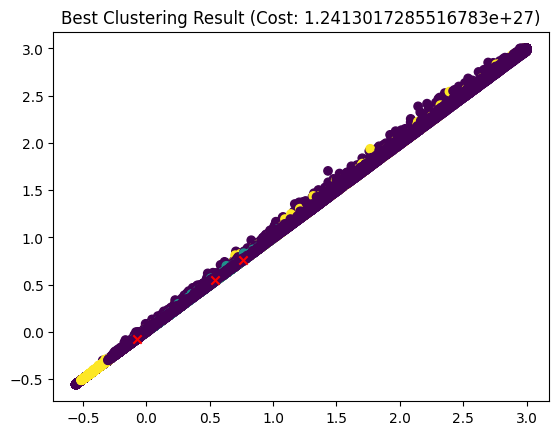

In [ ]:
# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], color='red', marker='x')
plt.title(f"Best Clustering Result (Cost: {best_cost})")
plt.show()